Sebastian Raschka, 2015-2020  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2020-11-25 

CPython 3.8.2
IPython 7.18.1

matplotlib 3.3.1
numpy 1.18.5
scipy 1.5.0
mlxtend 0.18.0.dev0


In [2]:
%matplotlib inline

# ExhaustiveFeatureSelector: Optimal feature sets by considering all possible feature combinations

Implementation of an *exhaustive feature selector* for sampling and evaluating all possible feature combinations in a specified range.

> from mlxtend.feature_selection import ExhaustiveFeatureSelector

## Overview

This exhaustive feature selection algorithm is a wrapper approach for brute-force evaluation of feature subsets; the best subset is selected by optimizing a specified performance metric given an arbitrary regressor or classifier. For instance, if the classifier is a logistic regression and the dataset consists of 4 features, the alogorithm will evaluate all 15 feature combinations (if `min_features=1` and `max_features=4`)

- {0}
- {1}
- {2}
- {3}
- {0, 1}
- {0, 2}
- {0, 3}
- {1, 2}
- {1, 3}
- {2, 3}
- {0, 1, 2}
- {0, 1, 3}
- {0, 2, 3}
- {1, 2, 3}
- {0, 1, 2, 3}

and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.



## Example 1 - A simple Iris example

Initializing a simple classifier from scikit-learn:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('0', '2', '3')


Note that in the example above, the  'best_feature_names_' are simply a string equivalent of the feature indices. However, we can provide custom feature names to the `fit` function for this mapping:

In [4]:
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
efs1 = efs1.fit(X, y, custom_feature_names=feature_names)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best subset (corresponding names): ('sepal length', 'petal length', 'petal width')


Via the `subsets_` attribute, we can take a look at the selected feature indices at each step:

In [5]:
efs1.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.53333333, 0.63333333, 0.73333333, 0.76666667, 0.63333333]),
  'avg_score': 0.6599999999999999,
  'feature_names': ('sepal length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.66666667, 0.63333333, 0.53333333, 0.56666667]),
  'avg_score': 0.5866666666666667,
  'feature_names': ('sepal width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.96666667, 0.96666667, 0.93333333, 0.86666667, 1.        ]),
  'avg_score': 0.9466666666666667,
  'feature_names': ('petal width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.66666667, 0.8       , 0.63333333, 0.86666667, 0.66666667]),
  'avg_score': 0.7266666666666667,
  'feature_names': ('sepal length', 'sepal width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.96666667, 1.  

## Example 2 - Visualizing the feature selection results

 For our convenience, we can visualize the output from the feature selection in a pandas DataFrame format using the `get_metric_dict` method of the `ExhaustiveFeatureSelector` object. The columns `std_dev` and `std_err` represent the standard deviation and standard errors of the cross-validation scores, respectively.

Below, we see the DataFrame of the Sequential Forward Selector from Example 2:

In [6]:
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

feature_names = ('sepal length', 'sepal width',
                 'petal length', 'petal width')
efs1 = efs1.fit(X, y, custom_feature_names=feature_names)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

Features: 15/15

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.966...",0.973333,"(sepal length, petal length, petal width)",0.0171372,0.0133333,0.00666667
14,"(0, 1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length, sepal width, petal length, peta...",0.0270963,0.0210819,0.0105409
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(sepal width, petal length, petal width)",0.0320608,0.0249444,0.0124722
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length,)",0.0514116,0.04,0.02
6,"(0, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(sepal length, petal width)",0.0436915,0.0339935,0.0169967
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.9, ...",0.953333,"(petal length, petal width)",0.0436915,0.0339935,0.0169967
3,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.946667,"(petal width,)",0.0581151,0.0452155,0.0226078
5,"(0, 2)","[0.9666666666666667, 1.0, 0.8666666666666667, ...",0.946667,"(sepal length, petal length)",0.0581151,0.0452155,0.0226078
7,"(1, 2)","[0.9666666666666667, 1.0, 0.9, 0.9333333333333...",0.946667,"(sepal width, petal length)",0.0436915,0.0339935,0.0169967
11,"(0, 1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.946667,"(sepal length, sepal width, petal width)",0.0436915,0.0339935,0.0169967


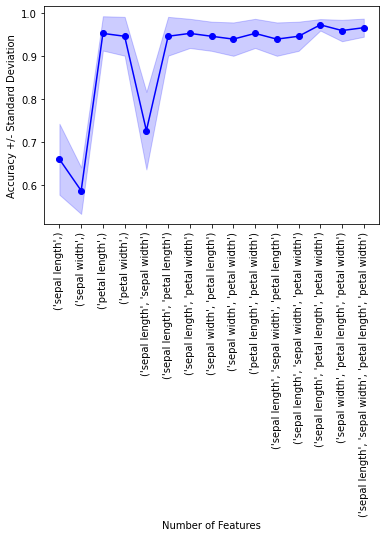

In [7]:
import matplotlib.pyplot as plt

metric_dict = efs1.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])
    
plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

## Example 3 - Exhaustive feature selection for regression analysis

Similar to the classification examples above, the `SequentialFeatureSelector` also supports scikit-learn's estimators
for regression.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=12,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

Features: 377/377


Best subset: (0, 1, 4, 6, 7, 8, 9, 10, 11, 12)


## Example 4 - Regression and adjusted R2

As shown in Example 3, the exhaustive feature selector can be used for selecting features via a regression model. In regression analysis, there exists the common phenomenon that the $R^2$ score can become spuriously inflated the more features we choose. Hence, and this is especially true for feature selection, it is useful to make model comparisons based on the adjusted $R^2$ value rather than the regular $R^2$. The adjusted $R^2$, $\bar{R}^{2}$, accounts for the number of features and examples as follows:

$$\bar{R}^{2}=1-\left(1-R^{2}\right) \frac{n-1}{n-p-1},$$

where $n$ is the number of examples and $p$ is the number of features.

One of the advantages of scikit-learn's API is that it's consistent, intuitive, and simple to use. However, one downside of this API design is that it can be a bit restrictive for certain scenarios. For instance, scikit-learn scoring function only take two inputs, the predicted and the true target values. Hence, we cannot use scikit-learn's scoring API to compute the adjusted $R^2$, which also requires the number of features.

However, as a workaround, we can compute the $R^2$ for the different feature subsets and then do a posthoc computation to obtain the adjusted $R^2$.

**Step 1: Compute $R^2$:**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=12,
          scoring='r2',
          cv=10)

efs.fit(X, y)

print('Best R2 score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

Features: 377/377


Best subset: (1, 3, 5, 6, 7, 8, 9, 10, 11, 12)


**Step 2: Compute adjusted $R^2$:**

In [10]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [11]:
for i in efs.subsets_:
    efs.subsets_[i]['adjusted_avg_score'] = (
        adjust_r2(r2=efs.subsets_[i]['avg_score'],
                  num_examples=X.shape[0]/10,
                  num_features=len(efs.subsets_[i]['feature_idx']))
    )

**Step 3: Select best subset based on adjusted $R^2$:**

In [12]:
score = -99e10

for i in efs.subsets_:
    score = efs.subsets_[i]['adjusted_avg_score']
    if ( efs.subsets_[i]['adjusted_avg_score'] == score and
        len(efs.subsets_[i]['feature_idx']) < len(efs.best_idx_) )\
      or efs.subsets_[i]['adjusted_avg_score'] > score:
        efs.best_idx_ = efs.subsets_[i]['feature_idx']

In [13]:
print('Best adjusted R2 score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)


Best subset: (1, 3, 5, 6, 7, 8, 9, 10, 11, 12)


## Example 5 - Using the selected feature subset For making new predictions

In [14]:
# Initialize the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
# Select the "best" three features via
# 5-fold cross-validation on the training set.

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           cv=5)
efs1 = efs1.fit(X_train, y_train)

Features: 15/15

In [16]:
print('Selected features:', efs1.best_idx_)

Selected features: (2, 3)


In [17]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, efs1.k_feature_idx_]

X_train_efs = efs1.transform(X_train)
X_test_efs = efs1.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_efs, y_train)
y_pred = knn.predict(X_test_efs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc*100))

Test set accuracy: 96.00 %


## Example 6 - Exhaustive feature selection and GridSearch

In [18]:
# Initialize the dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

Use scikit-learn's `GridSearch` to tune the hyperparameters of the `LogisticRegression` estimator inside the `ExhaustiveFeatureSelector` and use it for prediction in the pipeline. **Note that the `clone_estimator` attribute needs to be set to `False`.**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression(multi_class='multinomial', 
                        solver='newton-cg', 
                        random_state=123)

efs1 = EFS(estimator=lr, 
           min_features=2,
           max_features=3,
           scoring='accuracy',
           print_progress=False,
           clone_estimator=False,
           cv=5,
           n_jobs=1)

pipe = make_pipeline(efs1, lr)

param_grid = {'exhaustivefeatureselector__estimator__C': [0.1, 1.0, 10.0]}
    
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=2, 
                  verbose=1, 
                  refit=False)

# run gridearch
gs = gs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.2s finished


... and the "best" parameters determined by GridSearch are ...

In [20]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'exhaustivefeatureselector__estimator__C': 0.1}


#### Obtaining the best *k* feature indices after GridSearch

If we are interested in the best *k* best feature indices via `SequentialFeatureSelection.best_idx_`, we have to initialize a `GridSearchCV` object with `refit=True`. Now, the grid search object will take the complete training dataset and the best parameters, which it found via cross-validation, to train the estimator pipeline.

In [21]:
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=2, 
                  verbose=1, 
                  refit=True)

After running the grid search, we can access the individual pipeline objects of the `best_estimator_` via the `steps` attribute.

In [22]:
gs = gs.fit(X_train, y_train)
gs.best_estimator_.steps

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s finished


[('exhaustivefeatureselector',
  ExhaustiveFeatureSelector(clone_estimator=False,
                            estimator=LogisticRegression(C=0.1,
                                                         multi_class='multinomial',
                                                         random_state=123,
                                                         solver='newton-cg'),
                            max_features=3, min_features=2, print_progress=False)),
 ('logisticregression',
  LogisticRegression(multi_class='multinomial', random_state=123,
                     solver='newton-cg'))]

Via sub-indexing, we can then obtain the best-selected feature subset:

In [23]:
print('Best features:', gs.best_estimator_.steps[0][1].best_idx_)

Best features: (2, 3)


During cross-validation, this feature combination had a CV accuracy of:

In [24]:
print('Best score:', gs.best_score_)

Best score: 0.96


In [25]:
gs.best_params_

{'exhaustivefeatureselector__estimator__C': 0.1}

**Alternatively**, if we can set the "best grid search parameters" in our pipeline manually if we ran `GridSearchCV` with `refit=False`. It should yield the same results:

In [26]:
pipe.set_params(**gs.best_params_).fit(X_train, y_train)
print('Best features:', pipe.steps[0][1].best_idx_)

Best features: (2, 3)


## Example 7 - Working with pandas DataFrames

Optionally, we can also use pandas DataFrames and pandas Series as input to the `fit` function. In this case, the column names of the pandas DataFrame will be used as feature names. However, note that if `custom_feature_names` are provided in the fit function, these `custom_feature_names` take precedence over the DataFrame column-based feature names.

In [27]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
col_names = ('sepal length', 'sepal width',
             'petal length', 'petal width')
X_df = pd.DataFrame(iris.data, columns=col_names)
y_series = pd.Series(iris.target)
knn = KNeighborsClassifier(n_neighbors=4)

In [28]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_df, y_series)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length', 'petal length', 'petal width')


## Example 8 - Exhaustive Feature Selection with LOOCV

The `ExhaustiveFeatureSelector` is not restricted to k-fold cross-validation. You can use any type of cross-validation method that supports the general scikit-learn cross-validation API. 

The following example illustrates the use of scikit-learn's `LeaveOneOut` cross-validation method in combination with the exhaustive feature selector.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import LeaveOneOut


iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=LeaveOneOut()) ### Use cross-validation generator here

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.96
Best subset (indices): (3,)
Best subset (corresponding names): ('3',)


## API

In [30]:
with open('../../api_modules/mlxtend.feature_selection/ExhaustiveFeatureSelector.md', 'r') as f:
    print(f.read())

## ExhaustiveFeatureSelector

*ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)*

Exhaustive Feature Selection for Classification and Regression.
    (new in v0.4.3)

**Parameters**

- `estimator` : scikit-learn classifier or regressor


- `min_features` : int (default: 1)

    Minumum number of features to select

- `max_features` : int (default: 1)

    Maximum number of features to select

- `print_progress` : bool (default: True)

    Prints progress as the number of epochs
    to stderr.

- `scoring` : str, (default='accuracy')

    Scoring metric in {accuracy, f1, precision, recall, roc_auc}
    for classifiers,
    {'mean_absolute_error', 'mean_squared_error',
    'median_absolute_error', 'r2'} for regressors,
    or a callable object or function with
    signature ``scorer(estimator, X, y)``.

- `cv` : int (default: 5)

    Scikit-learn cross-validation ge